In [1]:
import numpy as np
import cmath
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import importlib

In [2]:
max_size = 65
shots = 8192

In [3]:
def P(n, shots, hist):
    count = 0
    count += hist.get("0" * n, 0) / shots
    count += hist.get("1" * n, 0) / shots
    return count

In [4]:
def S_phi(n, shots, hist):
    return hist.get("0" * n, 0) / shots

In [48]:
def C(n, shots, hists):
    iq = 0
    for i, hist in enumerate(hists):
        phi = (np.pi * i) / (n + 1)
        iq += cmath.exp(phi * n * 1j) * S_phi(n, shots, hist)
    iq = abs(iq) / len(hists)
    return 2 * np.sqrt(iq)

In [17]:
raw_fidelities = []
for n in range(1, max_size + 1):
    with open("./pkls/raw_results/results_" + str(n) + "-qubit.pkl", "rb") as f:
        raw_results = pickle.load(f)
    p = P(n, shots, raw_results["ghz"].get_counts())
    c = C(n, shots, raw_results["mqc"].get_counts())
    raw_fidelities.append((p + c) / 2)
    print(n, "qubit finished (fidelity: ", (p + c) / 2, ")")

1 qubit finished (fidelity:  1.2194926530093098 )
2 qubit finished (fidelity:  1.1720269440845261 )
3 qubit finished (fidelity:  1.1468444397128967 )
4 qubit finished (fidelity:  1.1285017487910816 )
5 qubit finished (fidelity:  1.0542049262328343 )
6 qubit finished (fidelity:  1.037623582765673 )
7 qubit finished (fidelity:  0.9682480252377005 )
8 qubit finished (fidelity:  0.9885560430464158 )
9 qubit finished (fidelity:  0.9126270050248039 )
10 qubit finished (fidelity:  0.9002388424380507 )
11 qubit finished (fidelity:  0.8843685419422106 )
12 qubit finished (fidelity:  0.8812972260093621 )
13 qubit finished (fidelity:  0.8574806892676756 )
14 qubit finished (fidelity:  0.8097078958637219 )
15 qubit finished (fidelity:  0.7588799374167676 )
16 qubit finished (fidelity:  0.7535465541024946 )
17 qubit finished (fidelity:  0.7199361739049459 )
18 qubit finished (fidelity:  0.6817303367749965 )
19 qubit finished (fidelity:  0.6592762378220003 )
20 qubit finished (fidelity:  0.416717736

In [49]:
for n in range(1, max_size + 1):
    with open("./pkls/raw_results/results_" + str(n) + "-qubit.pkl", "rb") as f:
        raw_results = pickle.load(f)
    p = P(n, shots, raw_results["ghz"].get_counts())
    c = C(n, shots, raw_results["mqc"].get_counts())
    print("p", p)
    print("c", c)
    print(n, "qubit finished (fidelity: ", (p + c) / 2, ")")

p 1.0
c 0.9562961866783224
1 qubit finished (fidelity:  0.9781480933391612 )
p 0.9268798828125
c 0.9256153791023047
2 qubit finished (fidelity:  0.9262476309574024 )
p 0.897216796875
c 0.9077592954581867
3 qubit finished (fidelity:  0.9024880461665934 )
p 0.8729248046875
c 0.9003558006511218
4 qubit finished (fidelity:  0.8866403026693108 )
p 0.795166015625
c 0.8400238382931131
5 qubit finished (fidelity:  0.8175949269590566 )
p 0.784423828125
c 0.8276727560803597
6 qubit finished (fidelity:  0.8060482921026799 )
p 0.6978759765625
c 0.7878145081165964
7 qubit finished (fidelity:  0.7428452423395482 )
p 0.7254638671875
c 0.7877930171711363
8 qubit finished (fidelity:  0.7566284421793181 )
p 0.6502685546875
c 0.7354124181068259
9 qubit finished (fidelity:  0.6928404863971629 )
p 0.64013671875
c 0.7259617284568388
10 qubit finished (fidelity:  0.6830492236034194 )
p 0.6173095703125
c 0.7186304482912595
11 qubit finished (fidelity:  0.6679700093018798 )
p 0.6229248046875
c 0.70745694603351

In [20]:
S_phis_list = []
for n in range(1, max_size + 1):
    with open("./pkls/raw_results/results_" + str(n) + "-qubit.pkl", "rb") as f:
        raw_results = pickle.load(f)
    S_phis = []
    for i, hist in enumerate(raw_results["mqc"].get_counts()):
        S_phis.append(S_phi(n, shots, hist))
    S_phis_list.append(S_phis)
    print(S_phis)

[0.97119140625, 0.53076171875, 0.056884765625, 0.5118408203125]
[0.928955078125, 0.2960205078125, 0.272705078125, 0.9317626953125, 0.29736328125, 0.2857666015625]
[0.89599609375, 0.2047119140625, 0.4764404296875, 0.7874755859375, 0.076171875, 0.762451171875, 0.520263671875, 0.1767578125]
[0.8790283203125, 0.1363525390625, 0.62353515625, 0.59521484375, 0.1646728515625, 0.8797607421875, 0.1455078125, 0.617919921875, 0.5946044921875, 0.152587890625]
[0.7623291015625, 0.0802001953125, 0.708251953125, 0.2977294921875, 0.3836669921875, 0.64306640625, 0.0955810546875, 0.7811279296875, 0.1650390625, 0.5545654296875, 0.490234375, 0.2120361328125]
[0.7344970703125, 0.0753173828125, 0.7166748046875, 0.205810546875, 0.4844970703125, 0.5020751953125, 0.1982421875, 0.75048828125, 0.072265625, 0.697998046875, 0.2130126953125, 0.4708251953125, 0.512451171875, 0.1976318359375]
[0.690673828125, 0.077392578125, 0.6396484375, 0.200927734375, 0.479736328125, 0.4384765625, 0.2264404296875, 0.642578125, 0.07

[0.0440673828125, 0.1473388671875, 0.0517578125, 0.13623046875, 0.076904296875, 0.1053466796875, 0.1075439453125, 0.086181640625, 0.1162109375, 0.0836181640625, 0.119384765625, 0.0986328125, 0.09814453125, 0.118408203125, 0.07861328125, 0.140380859375, 0.0693359375, 0.1336669921875, 0.08203125, 0.1180419921875, 0.1107177734375, 0.077880859375, 0.150146484375, 0.0545654296875, 0.1536865234375, 0.048828125, 0.1468505859375, 0.0587158203125, 0.1220703125, 0.092041015625, 0.09765625, 0.1068115234375, 0.0828857421875, 0.1160888671875, 0.0791015625, 0.1021728515625, 0.093505859375, 0.078369140625, 0.11279296875, 0.0672607421875, 0.12451171875, 0.069580078125, 0.1116943359375, 0.08642578125, 0.0765380859375, 0.11376953125, 0.058349609375, 0.1484375]
[0.085693359375, 0.100830078125, 0.0701904296875, 0.1204833984375, 0.060791015625, 0.11962890625, 0.072509765625, 0.10986328125, 0.0849609375, 0.09912109375, 0.1026611328125, 0.0880126953125, 0.1083984375, 0.093017578125, 0.0975341796875, 0.104858

[0.064697265625, 0.0362548828125, 0.0704345703125, 0.0386962890625, 0.06298828125, 0.0518798828125, 0.0584716796875, 0.06005859375, 0.0596923828125, 0.0594482421875, 0.06640625, 0.0491943359375, 0.0755615234375, 0.0369873046875, 0.0777587890625, 0.03564453125, 0.068603515625, 0.0467529296875, 0.0562744140625, 0.05908203125, 0.038818359375, 0.0697021484375, 0.041748046875, 0.0609130859375, 0.0462646484375, 0.049072265625, 0.060546875, 0.039794921875, 0.058837890625, 0.0374755859375, 0.0565185546875, 0.0494384765625, 0.04638671875, 0.0615234375, 0.0361328125, 0.0748291015625, 0.0394287109375, 0.062744140625, 0.0460205078125, 0.0618896484375, 0.059326171875, 0.0638427734375, 0.0595703125, 0.0638427734375, 0.0543212890625, 0.070556640625, 0.03955078125, 0.0780029296875, 0.0364990234375, 0.078857421875, 0.0447998046875, 0.063720703125, 0.054931640625, 0.04443359375, 0.0694580078125, 0.0335693359375, 0.0628662109375, 0.0418701171875, 0.0562744140625, 0.0518798828125, 0.042236328125, 0.060058

[0.0379638671875, 0.0299072265625, 0.039306640625, 0.0322265625, 0.0377197265625, 0.0416259765625, 0.0372314453125, 0.0394287109375, 0.04736328125, 0.03369140625, 0.0592041015625, 0.03173828125, 0.064453125, 0.0291748046875, 0.0499267578125, 0.0374755859375, 0.0360107421875, 0.044189453125, 0.0322265625, 0.041259765625, 0.033447265625, 0.0343017578125, 0.04248046875, 0.0223388671875, 0.04736328125, 0.0255126953125, 0.0462646484375, 0.0340576171875, 0.0345458984375, 0.0404052734375, 0.03466796875, 0.0386962890625, 0.0421142578125, 0.03271484375, 0.051513671875, 0.0341796875, 0.049072265625, 0.0374755859375, 0.037353515625, 0.051025390625, 0.026611328125, 0.0546875, 0.0277099609375, 0.0489501953125, 0.032958984375, 0.0364990234375, 0.0439453125, 0.0303955078125, 0.0445556640625, 0.0335693359375, 0.032470703125, 0.04443359375, 0.0242919921875, 0.0457763671875, 0.028076171875, 0.0472412109375, 0.0364990234375, 0.04150390625, 0.0421142578125, 0.04296875, 0.039306640625, 0.0511474609375, 0.0

[0.0186767578125, 0.01953125, 0.020751953125, 0.018310546875, 0.0208740234375, 0.0218505859375, 0.025634765625, 0.01708984375, 0.0264892578125, 0.0133056640625, 0.0269775390625, 0.015380859375, 0.0196533203125, 0.01611328125, 0.02001953125, 0.0213623046875, 0.0146484375, 0.0191650390625, 0.0111083984375, 0.0152587890625, 0.013671875, 0.0106201171875, 0.0128173828125, 0.0107421875, 0.0145263671875, 0.01171875, 0.013671875, 0.0140380859375, 0.0126953125, 0.017333984375, 0.01513671875, 0.0150146484375, 0.01611328125, 0.0167236328125, 0.0196533203125, 0.0189208984375, 0.021240234375, 0.015869140625, 0.02001953125, 0.018798828125, 0.0177001953125, 0.0174560546875, 0.01513671875, 0.0166015625, 0.0108642578125, 0.0133056640625, 0.012451171875, 0.012939453125, 0.01171875, 0.0120849609375, 0.009033203125, 0.009765625, 0.0101318359375, 0.0096435546875, 0.010498046875, 0.0106201171875, 0.0093994140625, 0.0150146484375, 0.011962890625, 0.0152587890625, 0.0133056640625, 0.0185546875, 0.017944335937

[0.012939453125, 0.0155029296875, 0.0157470703125, 0.015625, 0.020263671875, 0.0125732421875, 0.02099609375, 0.0133056640625, 0.0179443359375, 0.0147705078125, 0.015869140625, 0.0140380859375, 0.0107421875, 0.016845703125, 0.0084228515625, 0.0115966796875, 0.0087890625, 0.009521484375, 0.0081787109375, 0.008056640625, 0.00732421875, 0.0087890625, 0.007080078125, 0.0087890625, 0.0089111328125, 0.01220703125, 0.0103759765625, 0.0101318359375, 0.0126953125, 0.0140380859375, 0.0155029296875, 0.0142822265625, 0.0140380859375, 0.015380859375, 0.01416015625, 0.0164794921875, 0.010986328125, 0.0159912109375, 0.00927734375, 0.01220703125, 0.009033203125, 0.00830078125, 0.00732421875, 0.0054931640625, 0.0048828125, 0.0062255859375, 0.006591796875, 0.0052490234375, 0.0059814453125, 0.0086669921875, 0.011474609375, 0.0108642578125, 0.0126953125, 0.013916015625, 0.0133056640625, 0.0135498046875, 0.015869140625, 0.0159912109375, 0.014892578125, 0.0147705078125, 0.014404296875, 0.01611328125, 0.01098

[0.0115966796875, 0.0096435546875, 0.01318359375, 0.0072021484375, 0.0111083984375, 0.0123291015625, 0.0108642578125, 0.011962890625, 0.00927734375, 0.0098876953125, 0.006103515625, 0.007080078125, 0.0069580078125, 0.005126953125, 0.005859375, 0.00439453125, 0.0040283203125, 0.0040283203125, 0.0048828125, 0.00341796875, 0.00390625, 0.0045166015625, 0.004150390625, 0.0048828125, 0.0052490234375, 0.004638671875, 0.0048828125, 0.0054931640625, 0.005615234375, 0.0050048828125, 0.0054931640625, 0.005126953125, 0.0035400390625, 0.0047607421875, 0.005615234375, 0.004638671875, 0.004150390625, 0.0035400390625, 0.0035400390625, 0.002685546875, 0.0015869140625, 0.0009765625, 0.00146484375, 0.00146484375, 0.0015869140625, 0.0008544921875, 0.001220703125, 0.0006103515625, 0.001220703125, 0.0013427734375, 0.000732421875, 0.0010986328125, 0.0018310546875, 0.0020751953125, 0.00048828125, 0.0013427734375, 0.0009765625, 0.001953125, 0.00146484375, 0.0018310546875, 0.0009765625, 0.0020751953125, 0.00195

[0.0068359375, 0.0118408203125, 0.00537109375, 0.0103759765625, 0.0084228515625, 0.01123046875, 0.009521484375, 0.0078125, 0.0079345703125, 0.0096435546875, 0.0107421875, 0.00634765625, 0.0081787109375, 0.00634765625, 0.006103515625, 0.0050048828125, 0.006103515625, 0.0057373046875, 0.0048828125, 0.0045166015625, 0.003173828125, 0.0054931640625, 0.0050048828125, 0.0040283203125, 0.0030517578125, 0.00341796875, 0.004150390625, 0.003173828125, 0.0035400390625, 0.00439453125, 0.0057373046875, 0.0037841796875, 0.0045166015625, 0.00390625, 0.0050048828125, 0.0032958984375, 0.00537109375, 0.0035400390625, 0.003662109375, 0.003662109375, 0.00341796875, 0.0020751953125, 0.0025634765625, 0.0015869140625, 0.0020751953125, 0.0020751953125, 0.0010986328125, 0.0010986328125, 0.001220703125, 0.0013427734375, 0.001708984375, 0.0013427734375, 0.00146484375, 0.0003662109375, 0.0015869140625, 0.0015869140625, 0.0010986328125, 0.0013427734375, 0.001220703125, 0.0006103515625, 0.001953125, 0.001220703125,

In [43]:
I_qs_list = []
for i, n in enumerate(range(1, 15 + 1)):
    S_phis = S_phis_list[i]
    I_qs = np.fft.fft(np.array(S_phis), norm="forward")
    print(I_qs)
    I_qs_list.append(I_qs)

[ 0.51766968+0.j          0.22857666-0.00473022j -0.00363159+0.j
  0.22857666+0.00473022j]
[ 0.50209554+0.00000000e+00j  0.00050863+2.07908117e-03j
  0.21413167-5.03912894e-03j -0.00242106-1.44560290e-19j
  0.21413167+5.03912894e-03j  0.00050863-2.07908117e-03j]
[ 0.48753357+0.j         -0.00079996+0.00079522j -0.00306702-0.00036621j
  0.20575601-0.01016059j  0.00468445+0.j          0.20575601+0.01016059j
 -0.00306702+0.00036621j -0.00079996-0.00079522j]
[ 4.78918457e-01+0.00000000e+00j -1.63695386e-03-7.64291118e-04j
 -2.30146568e-03+3.31704443e-04j  1.78213626e-04+8.73009213e-05j
  2.02539503e-01+6.99163366e-03j  2.55126953e-03+6.50521303e-20j
  2.02539503e-01-6.99163366e-03j  1.78213626e-04-8.73009213e-05j
 -2.30146568e-03-3.31704443e-04j -1.63695386e-03+7.64291118e-04j]
[ 0.43115234+0.00000000e+00j  0.00094448+1.13654715e-03j
 -0.0008138 -4.05244635e-04j  0.00141398+1.08846029e-03j
 -0.00180054-4.93341294e-04j  0.16432855+6.41608975e-02j
  0.00303141+7.22801448e-20j  0.16432855-6.4

In [ ]:
for I_qs in I_qs_list:
    

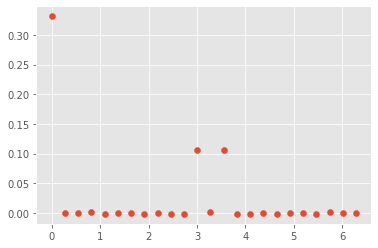

In [47]:
plt.scatter(np.linspace(0, 2 * np.pi, len(I_qs_list[10])), I_qs_list[10])

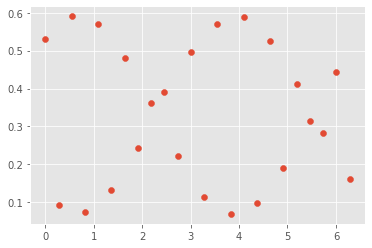

In [45]:
plt.style.use("ggplot")
plt.scatter(np.linspace(0, 2 * np.pi, len(S_phis_list[10])), S_phis_list[10])

In [7]:
with open("./pkls/lnp/info_" + str(3) + "-qubit.pkl", "rb") as f:
    lnp_results = pickle.load(f)

In [9]:
lnp_fidelities = []
for n in range(1, max_size + 1):
    with open("./pkls/lnp/info_" + str(n) + "-qubit.pkl", "rb") as f:
        lnp_results = pickle.load(f)
    p = P(n, shots, lnp_results["ghz"])
    c = C(n, shots, lnp_results["mqc"])
    lnp_fidelities.append((p + c) / 2)
    print(n, "qubit finished (fidelity: ", (p + c) / 2, ")")

1 qubit finished (fidelity:  1.0 )
2 qubit finished (fidelity:  1.0 )
3 qubit finished (fidelity:  1.0 )
4 qubit finished (fidelity:  1.0 )
5 qubit finished (fidelity:  1.0 )
6 qubit finished (fidelity:  1.0 )
7 qubit finished (fidelity:  1.0 )
8 qubit finished (fidelity:  1.0 )
9 qubit finished (fidelity:  1.0 )
10 qubit finished (fidelity:  1.0 )
11 qubit finished (fidelity:  1.0 )
12 qubit finished (fidelity:  1.0 )
13 qubit finished (fidelity:  1.0 )
14 qubit finished (fidelity:  1.0 )
15 qubit finished (fidelity:  1.0 )
16 qubit finished (fidelity:  1.0 )
17 qubit finished (fidelity:  1.0 )
18 qubit finished (fidelity:  1.0 )
19 qubit finished (fidelity:  1.0 )
20 qubit finished (fidelity:  1.0 )
21 qubit finished (fidelity:  1.0 )
22 qubit finished (fidelity:  1.0 )
23 qubit finished (fidelity:  1.0 )
24 qubit finished (fidelity:  1.0 )
25 qubit finished (fidelity:  1.0 )
26 qubit finished (fidelity:  1.0 )
27 qubit finished (fidelity:  1.0 )
28 qubit finished (fidelity:  1.0 )
2